In [1]:
arr = [[1, 1, 1, 6],
 [4, 1, 6, 2, 2],
 [3, 1, 4, 1, 2, 4],
 [2, 5, 6, 3, 4, 2, 3],
 [1, 3, 2, 1, 4, 3],
 [4, 6, 6, 5, 6],
 [6, 2, 5, 6]]

In [3]:
import numpy as np

arr = [[1, 1, 1, 6],
 [4, 1, 6, 2, 2],
 [3, 1, 4, 1, 2, 4],
 [2, 5, 6, 3, 4, 2, 3],
 [1, 3, 2, 1, 4, 3],
 [4, 6, 6, 5, 6],
 [6, 2, 5, 6]]

rectangle = np.zeros((len(arr), 7), dtype='int')
for i in range(len(arr)):
    if i<4:
        rectangle[i:i + 1, 7-len(arr[i]):] = arr[i]
    else:
        rectangle[i:i + 1, :len(arr[i])] = arr[i]

In [4]:
rectangle

array([[0, 0, 0, 1, 1, 1, 6],
       [0, 0, 4, 1, 6, 2, 2],
       [0, 3, 1, 4, 1, 2, 4],
       [2, 5, 6, 3, 4, 2, 3],
       [1, 3, 2, 1, 4, 3, 0],
       [4, 6, 6, 5, 6, 0, 0],
       [6, 2, 5, 6, 0, 0, 0]])

In [15]:
axial_cords = np.zeros((len(arr), 7), dtype='int')
for i in range(len(arr)):
    axial_cords[i] = range(-3,4)

ax_cords = np.array([axial_cords, axial_cords.T])

In [16]:
lookup = '''1	1	4	1	0	3	0	0
1	2	1	6	0	1	1	2
1	2	4	6	2	0	1	4
1	3	1	5	4	0	0	2
1	3	4	5	2	1	0	0
1	4	1	4	0	3	1	0
1	4	4	4	0	0	1	0
1	5	1	3	4	2	0	0
1	5	4	3	0	1	0	2
1	6	1	2	2	1	1	0
1	6	4	2	0	2	1	4
2	1	1	6	1	4	0	0
2	1	4	6	0	0	0	5
2	2	1	5	0	4	1	1
2	2	4	5	0	1	1	1
2	3	1	4	1	0	0	4
2	3	4	4	4	0	0	1
2	4	1	3	1	1	1	0
2	4	4	3	3	0	1	2
2	5	1	2	5	0	0	0
2	5	4	2	2	0	0	3
2	6	1	1	0	2	1	3
2	6	4	1	1	0	1	4
3	1	1	5	0	0	0	4
3	1	4	5	2	5	0	0
3	2	1	4	0	1	1	0
3	2	4	4	0	4	1	0
3	3	1	3	4	0	0	0
3	3	4	3	1	0	0	3
3	4	1	2	3	0	1	1
3	4	4	2	0	0	1	4
3	5	1	1	0	4	0	0
3	5	4	1	0	1	0	0
3	6	1	6	1	0	1	3
3	6	4	6	4	0	1	0
4	1	1	4	3	0	0	0
4	1	4	4	0	0	0	3
4	2	1	3	2	0	1	1
4	2	4	3	1	2	1	0
4	3	1	2	1	0	0	2
4	3	4	2	0	2	0	1
4	4	1	1	0	0	1	3
4	4	4	1	3	0	1	0
4	5	1	6	1	2	0	0
4	5	4	6	2	0	0	1
4	6	1	5	0	2	1	1
4	6	4	5	1	0	1	2
5	1	1	3	0	0	0	2
5	1	4	3	0	3	0	2
5	2	1	2	0	1	1	4
5	2	4	2	2	0	1	0
5	3	1	1	0	2	0	0
5	3	4	1	0	5	0	0
5	4	1	6	0	3	1	2
5	4	4	6	0	0	1	2
5	5	1	5	2	0	0	0
5	5	4	5	0	1	0	4
5	6	1	4	1	0	1	1
5	6	4	4	0	2	1	0
6	1	1	2	0	3	0	1
6	1	4	2	0	0	0	1
6	2	1	1	2	0	1	5
6	2	4	1	0	1	1	3
6	3	1	6	1	0	0	0
6	3	4	6	1	3	0	0
6	4	1	5	0	0	1	1
6	4	4	5	0	3	1	1
6	5	1	4	0	1	0	3
6	5	4	4	3	1	0	0
6	6	1	3	0	2	1	5
6	6	4	3	1	0	1	0'''
lookup = np.array([np.fromstring(row, sep=' ') for row in lookup.split('\n')])

In [17]:
np.save('lookup.npy', lookup)

In [47]:
import hexy as hx
import numpy as np
import matplotlib.pyplot as plt

axial_cords = np.zeros((len(arr), 7), dtype='int')
for i in range(len(arr)):
    axial_cords[i] = range(-3,4)

ax_cords_map = np.array([axial_cords, axial_cords.T]).T

SE = np.array((0, 1))
SW = np.array((-1, 1))
W = np.array((-1, 0))
NW = np.array((0, -1))
NE = np.array((1, -1))
E = np.array((1, 0))
ALL_DIRECTIONS = np.array([NW, NE, E, SE, SW, W, ])

def get_neighbor(hex, direction):
    return hex + direction

class CyclicInteger:
    """
    A simple helper class for "cycling" an integer through a range of values. Its value will be set to `lower_limit`
    if it increases above `upper_limit`. Its value will be set to `upper_limit` if its value decreases below
    `lower_limit`.
    """
    def __init__(self, initial_value, lower_limit, upper_limit):
        self.value = initial_value
        self.lower_limit = lower_limit
        self.upper_limit = upper_limit

    def increment(self):
        self.value += 1
        if self.value > self.upper_limit:
            self.value = self.lower_limit

    def decrement(self):
        self.value -= 1
        if self.value < self.lower_limit:
            self.value = self.upper_limit


class HexTile(hx.HexTile):
    def __init__(self, axial_coordinates, radius, tile_id):
        super().__init__(axial_coordinates, radius, tile_id)
        self.color='k'

    def set_value(self, value):
        self.value = CyclicInteger(value, 1, 6)

class HexMap:
    def __init__(self, size, values):

        self.hex_map = hx.HexMap()
        self.max_coord = size

        # Get all possible coordinates within `self.max_coord` as radius.
        spiral_coordinates = hx.get_spiral(np.array((0, 0, 0)), 0, self.max_coord)

        # Convert `spiral_coordinates` to axial coordinates, create hexes 
        hexes = []
        axial_coordinates = hx.cube_to_axial(spiral_coordinates)
        for i, axial in enumerate(axial_coordinates):
            hexes.append(HexTile(axial, 1, i))
            
        self.hex_map[np.array(axial_coordinates)] = hexes

        for i in range(7):
            for j in range(7):
                if values[i,j]!=0:
                    self.hex_map[ax_cords_map[i,j]][0].set_value(values[i,j])


    def get_disk(self, center):
        nbs = [get_neighbor(center, dir) for dir in ALL_DIRECTIONS]
        return [center, *nbs]

    def tap(self, ij):
        tapped = self.hex_map[ij][0]
        tap_co = tapped.axial_coordinates

        for coords in self.get_disk(tap_co):
            if len(self.hex_map[coords])>0:
                self.hex_map[coords][0].value.increment()
                if self.hex_map[coords][0].color=='k':
                    self.hex_map[coords][0].color ='r'
    
    def print(self):
        plt.figure(figsize=(10,10))
        theta = np.radians(90)
        c, s = np.cos(theta), np.sin(theta)
        R = np.array(((c, -s), (s, c)))
        proj = 1/np.sqrt(6)*np.array([[np.sqrt(3),0],[1,2]])

        for h in self.hex_map.items():
            hex = h[1]
            coo = hex.axial_coordinates
            coo = np.matmul(proj, coo.T)
            coo = np.matmul(R, coo)
            plt.text(coo[1]/4, coo[0]/4, hex.value.value, c=hex.color, fontsize=40)
        
        plt.axis('off')
        plt.xlim([-1,1])
        plt.ylim([-1,1])
        plt.show()


[[-1.  1.]]


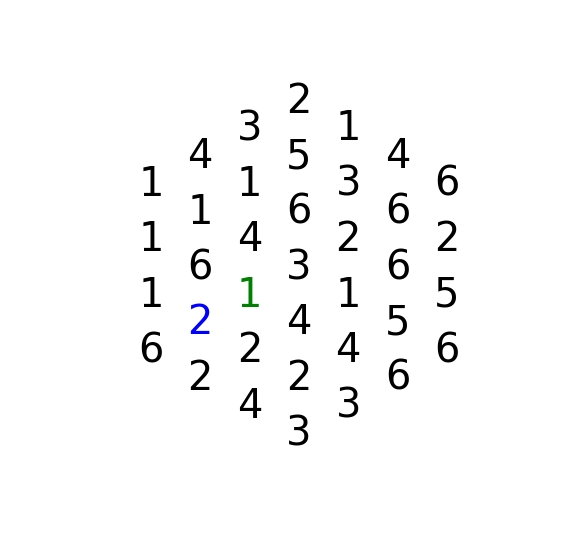

In [48]:
hm = HexMap(3, rectangle)

start = [-2, 2]
curr = hm.hex_map[np.array([start])][0]
curr.color = 'b'
target = get_neighbor(curr.axial_coordinates, NE)
target = hm.hex_map[target][0]
target.color='g'
print(target.axial_coordinates)
hm.print()

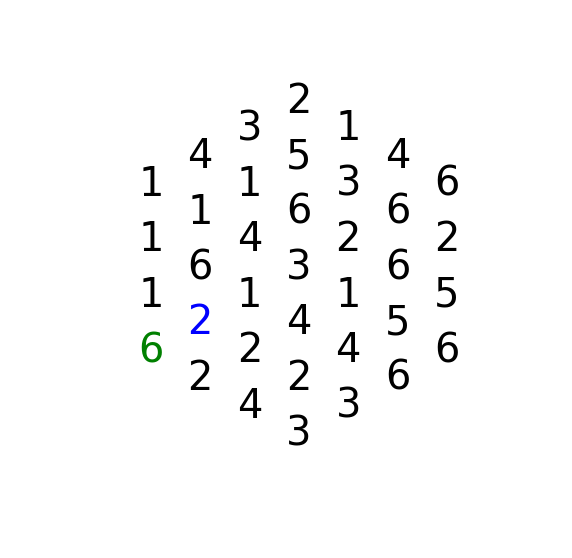

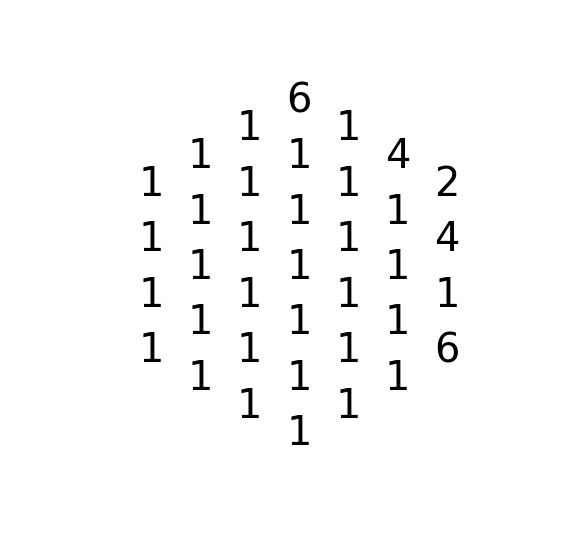

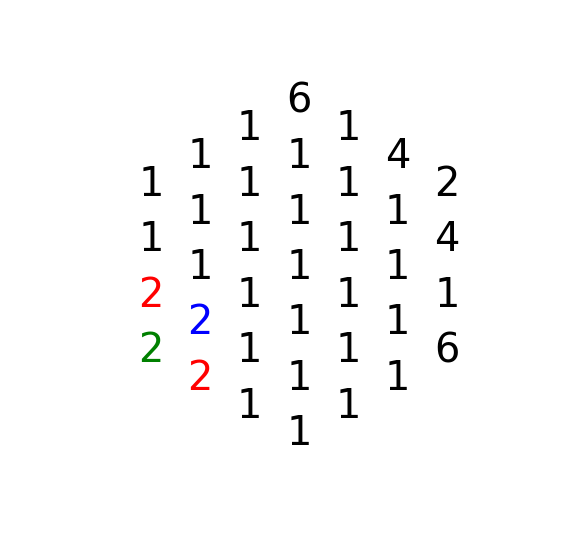

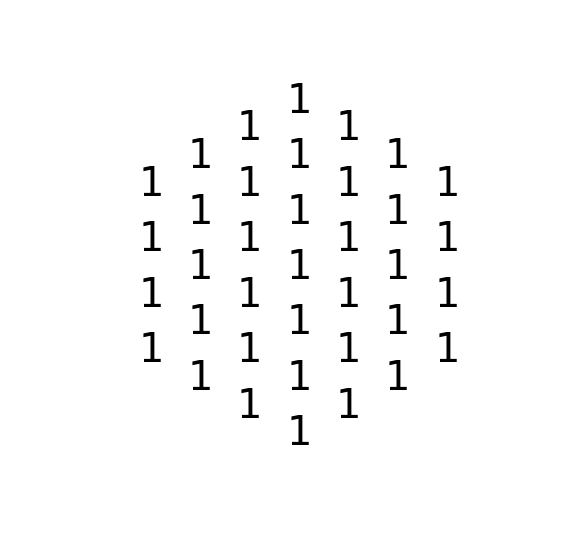

[array([[-2.,  2.]]),
 array([[-2.,  2.]]),
 array([[-2.,  2.]]),
 array([[-2.,  2.]]),
 array([[-2.,  2.]]),
 array([[0., 1.]]),
 array([[1., 1.]]),
 array([[1., 1.]]),
 array([[1., 1.]]),
 array([[1., 1.]]),
 array([[1., 1.]]),
 array([[2., 1.]]),
 array([[-1.,  0.]]),
 array([[-1., -1.]]),
 array([[-1., -1.]]),
 array([[-1., -1.]]),
 array([[-1., -1.]]),
 array([[-1., -1.]]),
 array([[-1., -2.]]),
 array([[0., 0.]]),
 array([[0., 0.]]),
 array([[0., 0.]]),
 array([[0., 0.]]),
 array([[0., 0.]]),
 array([[1., 0.]]),
 array([[2., 0.]]),
 array([[2., 0.]]),
 array([[2., 0.]]),
 array([[2., 0.]]),
 array([[3., 0.]]),
 array([[3., 0.]]),
 array([[ 0., -1.]]),
 array([[ 0., -2.]]),
 array([[ 0., -2.]]),
 array([[ 0., -2.]]),
 array([[ 0., -2.]]),
 array([[ 0., -3.]]),
 array([[ 0., -3.]]),
 array([[ 1., -1.]]),
 array([[ 1., -1.]]),
 array([[ 1., -1.]]),
 array([[ 2., -1.]]),
 array([[ 2., -1.]]),
 array([[ 2., -1.]]),
 array([[ 2., -1.]]),
 array([[ 2., -1.]]),
 array([[ 1., -2.]]),
 arr

In [49]:
hm = HexMap(3, rectangle)

def propagate_1s(hm):

    taps = []

    start = [-2, 2]
    curr = hm.hex_map[np.array([start])][0]
    curr.color = 'b'
    target = get_neighbor(curr.axial_coordinates, SW)
    target = hm.hex_map[target][0]
    target.color='g'

    hm.print()
    for start in [[-2, 2],[-1, 1],[0, 0],[1, -1],[2, -2],[3,-3]]:
        for dir in [E, NW]:
            curr = hm.hex_map[np.array([start])][0]
            curr.color = 'b'
            target = get_neighbor(curr.axial_coordinates, SW)
            target = hm.hex_map[target][0]
            target.color='g'

            for i in range(7):
                while target.value.value!=1:
                    taps.append(curr.axial_coordinates)
                    hm.tap(curr.axial_coordinates)

                for hex in hm.hex_map.items():
                    hex[1].color='k'

                curr = get_neighbor(curr.axial_coordinates, dir)
                if len(hm.hex_map[curr])>0:
                    curr = hm.hex_map[curr][0]
                else:
                    break
                curr.color = 'b'

                target = get_neighbor(curr.axial_coordinates, SW)
                if len(hm.hex_map[target])>0:
                    target = hm.hex_map[target][0]
                else:
                    break
                target.color='g'
    hm.print()
    return taps

propagate_1s(hm)
bottom = hm.hex_map[np.array([[0,-3],[1,-3],[2,-3],[3,-3]])]
bottom = [b.value.value for b in bottom]

solution = lookup[np.array([lookup[:,i]==bottom[i] for i in range (4)]).all(axis=0),4:][0]

for t, loc in zip(solution, [[-3,0],[-3,1],[-3,2],[-3,3]]):
    for n in range(int(t)):
        hm.tap(np.array(loc))

propagate_1s(hm)


In [25]:
import arrow
import numpy as np

arr = [[1, 1, 1, 6],
 [4, 1, 6, 2, 2],
 [3, 1, 4, 1, 2, 4],
 [2, 5, 6, 3, 4, 2, 3],
 [1, 3, 2, 1, 4, 3],
 [4, 6, 6, 5, 6],
 [6, 2, 5, 6]]

rectangle = np.zeros((len(arr), 7), dtype='int')
for i in range(len(arr)):
    if i<4:
        rectangle[i:i + 1, 7-len(arr[i]):] = arr[i]
    else:
        rectangle[i:i + 1, :len(arr[i])] = arr[i]

taps = arrow.solve(rectangle, transform=False)

In [26]:
unique_rows, counts = np.unique(np.array(taps), axis=0, return_counts=True)

In [31]:
1024/36

28.444444444444443

In [30]:
len('"input touchscreen tap 226.0 1225.0"')

36

In [27]:
sum(counts%6)

70

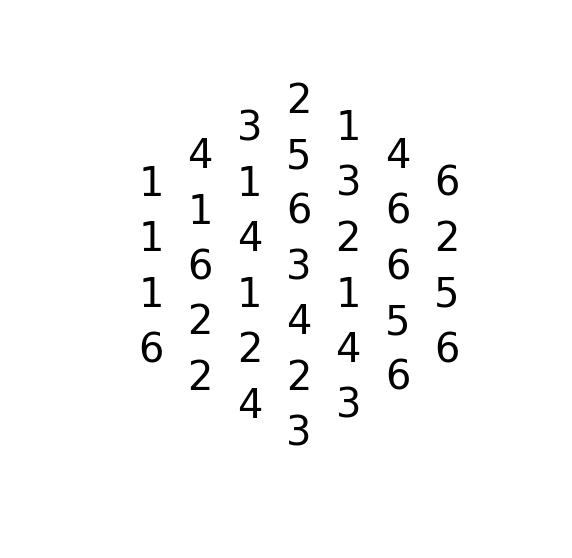

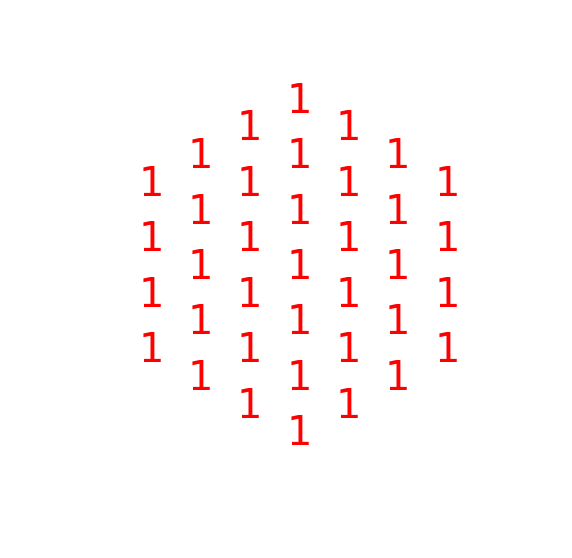

In [28]:
from arrow import HexMap
import random


random.shuffle(taps)
hm = HexMap(3, rectangle)
hm.print()
unique_rows, counts = np.unique(np.array(taps), axis=0, return_counts=True)

for hex, count in zip(unique_rows, counts):
    for i in range(count):
        hm.tap(hm.hex_map[hex][0].axial_coordinates)

hm.print()

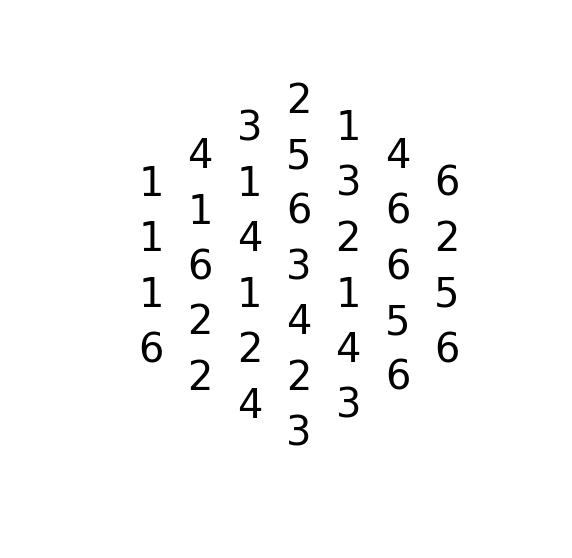

In [11]:
plt.figure(figsize=(10,10))
theta = np.radians(90)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
proj = 1/np.sqrt(6)*np.array([[np.sqrt(3),0],[1,2]])

for h in hm.hex_map.items():
    hex = h[1]
    coo = hex.axial_coordinates
    coo = np.matmul(proj, coo.T)
    coo = np.matmul(R, coo)
    plt.text(coo[1]/4, coo[0]/4, hex.value.value, c=hex.color, fontsize=40)

plt.axis('off')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [7]:
coo = []

for h in hm.hex_map.items():
    hex = h[1]
    coo.append(hex.axial_coordinates[0])

coo_arr = np.array(coo)

127.09989231875039, 962.9001076812497
903.4505206717138, 1868.5494793282862


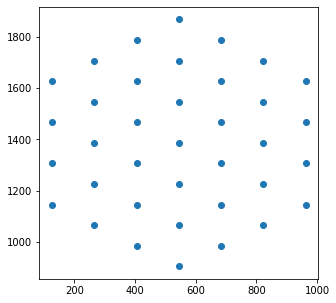

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

theta = np.radians(90)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
proj = 1/np.sqrt(6)*np.array([[np.sqrt(3),0],[1,2]])



coo = np.matmul(proj, coo_arr.T)
coo = np.matmul(R, coo)
coo = coo[[1,0],:]

hex_grid = {'offset':[[545,1386]], 'scale':1182}

coo = coo/(3) * hex_grid['scale']/2

coo = (coo.T + hex_grid['offset']).T

plt.scatter(coo[0,:],coo[1,:])
# plt.xlim([-4,4])
# plt.ylim([-4,4])


print(f'{coo[0].min()}, {coo[0].max()}')
print(f'{coo[1].min()}, {coo[1].max()}')

In [9]:
coo

array([[ 545.        ,  405.69996411,  405.69996411,  545.        ,
         684.30003589,  684.30003589,  545.        ,  266.39992821,
         266.39992821,  266.39992821,  405.69996411,  545.        ,
         684.30003589,  823.60007179,  823.60007179,  823.60007179,
         684.30003589,  545.        ,  405.69996411,  127.09989232,
         127.09989232,  127.09989232,  127.09989232,  266.39992821,
         405.69996411,  545.        ,  684.30003589,  823.60007179,
         962.90010768,  962.90010768,  962.90010768,  962.90010768,
         823.60007179,  684.30003589,  545.        ,  405.69996411,
         266.39992821],
       [1386.        , 1466.42491322, 1305.57508678, 1225.15017356,
        1305.57508678, 1466.42491322, 1546.84982644, 1546.84982644,
        1386.        , 1225.15017356, 1144.72526034, 1064.30034711,
        1144.72526034, 1225.15017356, 1386.        , 1546.84982644,
        1627.27473966, 1707.69965289, 1627.27473966, 1627.27473966,
        1466.42491322, 1

In [27]:
hex_grid = {'offset':[[540,1386]], 'scale':812}

taps_t = taps/(3) * hex_grid['scale']/2

taps_t = taps_t + hex_grid['offset']
taps_t = np.around(taps_t)

taps_t[0]

array([ 269., 1657.])

In [29]:
taps_t[0]

array([ 269., 1657.])